In [27]:
import json

# handle = open('values.txt', 'r')
# data = json.load(handle)
# handle.close()

# print(len(data))

# iass = [k['indicated_airspeed'] for k in data]
# vsis = [k['vertical_airspeed'] for k in data]

data = None
with open('params.txt', 'r') as handle:
    data = json.load(handle)
    for k, v in data.items():
        print(k, len(v))
    
    iass = data['IAS']
    vsis = data['VSI']
    ctrs = data['CTR']
    hdgs = data['HDG']
        
        
with open('t_params.txt', 'r') as handle:
    data = json.load(handle)
    for k, v in data.items():
        print(k, len(v))
        
    speed_diffs = data['speed-diffs']
    agls = data['agl']
    
    
with open('turn_params.txt', 'r') as handle:
    data = json.load(handle)
    for k, v in data.items():
        print(k, len(v))
        
    turn_ctrs = data['turn-cross-track-error']
    

with open('scores.txt', 'r') as handle:
    scores = json.load(handle)
    print(len(scores))

HDG 3362
CTR 3362
IAS 3796
VSI 3796
speed-diffs 4956
agl 4956
turn-cross-track-error 262
380


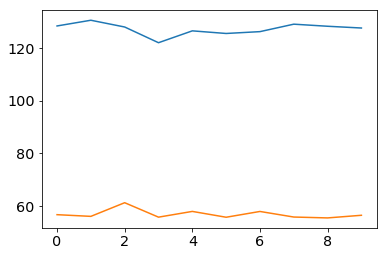

In [7]:
linear = (128.275,
  130.441,
  127.878,
  121.923,
  126.418,
  125.425,
  126.123,
  128.949,
  128.161,
  127.494)

multi = (56.726,
  56.086,
  61.263,
  55.787,
  57.964,
  55.753,
  57.945,
  55.83,
  55.497,
  56.496)


t1 = range(len(linear))
plt.plot(t1, linear)
plt.plot(t1, multi)

In [3]:
import math

def roundup(x, step):
    return int(math.ceil(x / step)) * step

def rounddown(x, step):
    return int(math.floor(x / step)) * step

In [4]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large',
}

pylab.rcParams.update(params)

def make_histogram(data, step, filename, xlabel, ylabel='Probability Density', title='', num_bins=75):
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)

    print(mu, sigma)

    fig, ax = plt.subplots()

    # histogram
    n, bins, patches = ax.hist(data, num_bins, density=1, color='#A3B6E4')

    print(len(bins))

    # 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--', color='#1F9B18', linewidth=2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    start, end = rounddown(min(data), step), roundup(max(data), step)
    plt.xticks(np.arange(start, end+step, step))
    print(start, end)

    fig.tight_layout()
    fig.savefig(filename, dpi=300, format='png')
    plt.show()

64.81128724913846 4.791375301116499
76
50.0 95.0


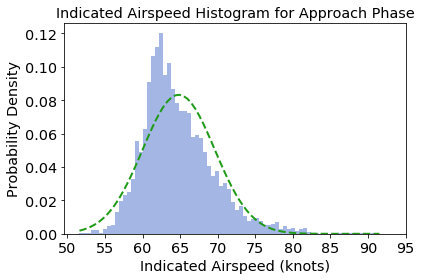

In [14]:
make_histogram(iass, 5.0, 'orig_ias_hist.png', 'Indicated Airspeed (knots)', title='Indicated Airspeed Histogram for Approach Phase')

64.40127766069547 4.534888688369468
0.13420691936242124 76
50.0 90.0


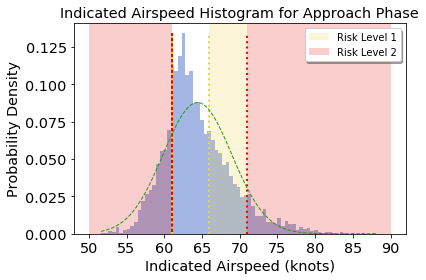

In [29]:
data = iass
step = 5.0
filename = 'revised_ias_hist.png'
xlabel = 'Indicated Airspeed (knots)'
ylabel = 'Probability Density'
title = 'Indicated Airspeed Histogram for Approach Phase'
num_bins = 75

yellow = '#F1D138'
red = '#e20b00'

mu = np.mean(data)
sigma = np.std(data, ddof=1)

print(mu, sigma)

fig, ax = plt.subplots()
# ax.set_facecolor('black')

# histogram
n, bins, patches = ax.hist(data, num_bins, density=1, color='#A3B6E4')

print(max(n), len(bins))

# 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--', color='#1F9B18', linewidth=1)

ax.vlines(61, 0, max(n), colors=red, linestyles='solid', linewidth=2)
ax.axvspan(50, 61, facecolor=red, alpha=0.2, label='Risk Level 2')
ax.vlines(61, 0, max(n), colors=yellow, linestyles='dotted', linewidth=2)

ax.vlines(66, 0, max(n), colors=yellow, linestyles='dotted', linewidth=2)
r1 = ax.axvspan(66, 71, facecolor=yellow, alpha=0.2, label='Risk Level 1')
ax.vlines(71, 0, max(n), colors=red, linestyles='dotted', linewidth=2)
r2 = ax.axvspan(71, 90, facecolor=red, alpha=0.2, label='Risk Level 2')

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(title)

ax.legend((r1, r2), ('Risk Level 1', 'Risk Level 2'), loc='upper right', shadow=True)

start, end = rounddown(min(data), step), roundup(max(data), step)
plt.xticks(np.arange(start, end+step, step))
print(start, end)

fig.tight_layout()
fig.savefig(filename, dpi=300, format='png')
plt.show()

-364.52825079030555 181.20961137418584
76
-2000.0 500.0


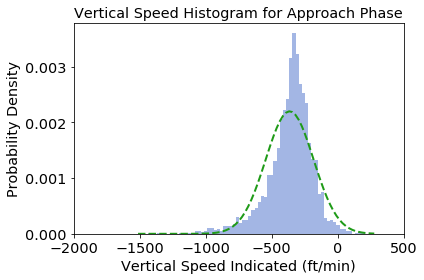

In [231]:
make_histogram(vsis, 500.0, 'orig_vsi_hist.png', 'Vertical Speed Indicated (ft/min)', title='Vertical Speed Histogram for Approach Phase')

-364.52825079030555 181.20961137418584
0.003600732623173619 76
-2000.0 500.0


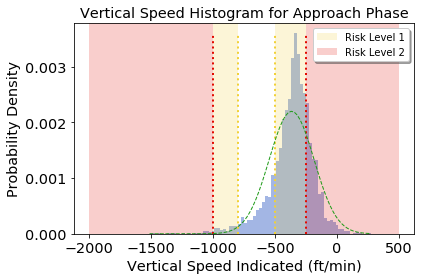

In [31]:
data = vsis
step = 500.0
filename = 'revised_vsi_hist.png'
xlabel = 'Vertical Speed Indicated (ft/min)'
ylabel = 'Probability Density'
title = 'Vertical Speed Histogram for Approach Phase'
num_bins = 75

yellow = '#F1D138'
red = '#e20b00'

mu = np.mean(data)
sigma = np.std(data, ddof=1)

print(mu, sigma)

fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(data, num_bins, density=1, color='#A3B6E4')

print(max(n), len(bins))

# 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--', color='#1F9B18', linewidth=1)

ax.vlines(-1000, 0, max(n), colors=red, linestyles='dotted', linewidth=2)
r2 = ax.axvspan(-2000, -1000, facecolor=red, alpha=0.2, label='Risk Level 2')
ax.vlines(-800, 0, max(n), colors=yellow, linestyles='dotted', linewidth=2)
r1 = ax.axvspan(-1000, -800, facecolor=yellow, alpha=0.2, label='Risk Level 1')

ax.vlines(-500, 0, max(n), colors=yellow, linestyles='dotted', linewidth=2)
ax.axvspan(-500, -250, facecolor=yellow, alpha=0.2, label='Risk Level 1')
ax.vlines(-250, 0, max(n), colors=red, linestyles='dotted', linewidth=2)
ax.axvspan(-250, 500, facecolor=red, alpha=0.2, label='Risk Level 2')

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(title)

ax.legend((r1, r2), ('Risk Level 1', 'Risk Level 2'), loc='upper right', shadow=True)

start, end = rounddown(min(data), step), roundup(max(data), step)
plt.xticks(np.arange(start, end+step, step))
print(start, end)

fig.tight_layout()
fig.savefig(filename, dpi=300, format='png')
plt.show()

-4.541815124994322 15.499232022998418
76
-140.0 140.0


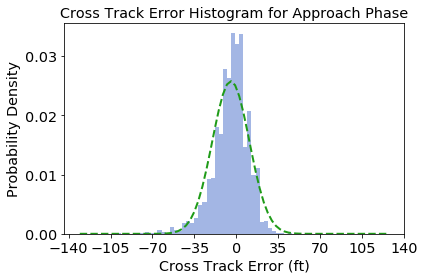

In [230]:
make_histogram(ctrs, 35.0, 'orig_cross_track_hist.png', 'Cross Track Error (ft)', num_bins=75, title='Cross Track Error Histogram for Approach Phase')

-4.541815124994322 15.499232022998418
0.0337933939318414 76
-140.0 140.0


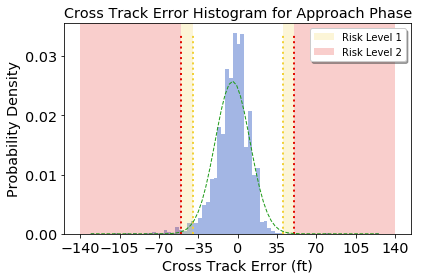

In [32]:
data = ctrs
step = 35.0
filename = 'revised_cross_track_hist.png'
xlabel = 'Cross Track Error (ft)'
ylabel = 'Probability Density'
title = 'Cross Track Error Histogram for Approach Phase'
num_bins = 75

yellow = '#F1D138'
red = '#e20b00'

mu = np.mean(data)
sigma = np.std(data, ddof=1)

print(mu, sigma)

fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(data, num_bins, density=1, color='#A3B6E4')

print(max(n), len(bins))

# 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--', color='#1F9B18', linewidth=1)

ax.vlines(-50, 0, max(n), colors=red, linestyles='dotted', linewidth=2)
r2 = ax.axvspan(-140, -50, facecolor=red, alpha=0.2, label='Risk Level 2')
ax.vlines(-40, 0, max(n), colors=yellow, linestyles='dotted', linewidth=2)
r1 = ax.axvspan(-50, -40, facecolor=yellow, alpha=0.2, label='Risk Level 1')

ax.vlines(40, 0, max(n), colors=yellow, linestyles='dotted', linewidth=2)
ax.axvspan(40, 50, facecolor=yellow, alpha=0.2, label='Risk Level 1')
ax.vlines(50, 0, max(n), colors=red, linestyles='dotted', linewidth=2)
ax.axvspan(50, 140, facecolor=red, alpha=0.2, label='Risk Level 2')

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(title)

ax.legend((r1, r2), ('Risk Level 1', 'Risk Level 2'), loc='upper right', shadow=True)

start, end = rounddown(min(data), step), roundup(max(data), step)
plt.xticks(np.arange(start, end+step, step))
print(start, end)

fig.tight_layout()
fig.savefig(filename, dpi=300, format='png')
plt.show()

1.9580249851278992 4.760696485624347
51
-20.0 20.0


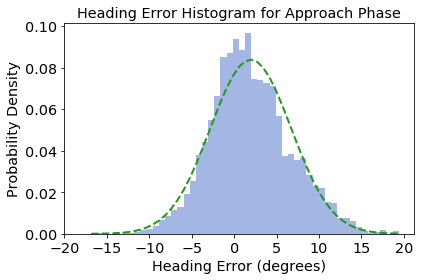

In [233]:
make_histogram(hdgs, 5.0, 'orig_heading_hist.png', 'Heading Error (degrees)', num_bins=50, title='Heading Error Histogram for Approach Phase')

1.9580249851278992 4.760696485624347
0.09643883791446514 51
-20.0 20.0


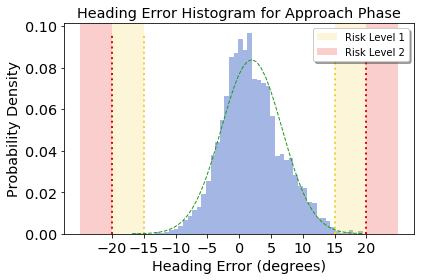

In [35]:
data = hdgs
step = 5.0
filename = 'revised_heading_hist.png'
xlabel = 'Heading Error (degrees)'
ylabel = 'Probability Density'
title = 'Heading Error Histogram for Approach Phase'
num_bins = 50

yellow = '#F1D138'
red = '#e20b00'

mu = np.mean(data)
sigma = np.std(data, ddof=1)

print(mu, sigma)

fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(data, num_bins, density=1, color='#A3B6E4')

print(max(n), len(bins))

# 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--', color='#1F9B18', linewidth=1)

ax.vlines(-20, 0, max(n), colors=red, linestyles='dotted', linewidth=2)
r2 = ax.axvspan(-25, -20, facecolor=red, alpha=0.2, label='Risk Level 2')
ax.vlines(-15, 0, max(n), colors=yellow, linestyles='dotted', linewidth=2)
r1 = ax.axvspan(-20, -15, facecolor=yellow, alpha=0.2, label='Risk Level 1')

ax.vlines(15, 0, max(n), colors=yellow, linestyles='dotted', linewidth=2)
ax.axvspan(15, 20, facecolor=yellow, alpha=0.2, label='Risk Level 1')
ax.vlines(20, 0, max(n), colors=red, linestyles='dotted', linewidth=2)
ax.axvspan(20, 25, facecolor=red, alpha=0.2, label='Risk Level 2')

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title(title)

ax.legend((r1, r2), ('Risk Level 1', 'Risk Level 2'), loc='upper right', shadow=True)

start, end = rounddown(min(data), step), roundup(max(data), step)
plt.xticks(np.arange(start, end+step, step))
print(start, end)

fig.tight_layout()
fig.savefig(filename, dpi=300, format='png')
plt.show()

-1.0398849878934624 1.3166504327831101
76
-26.0 0.0


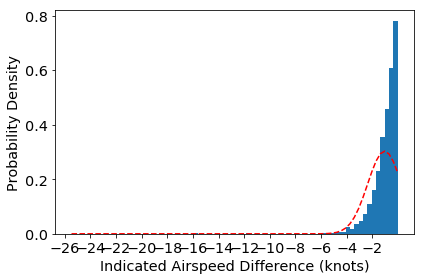

In [120]:
make_histogram(speed_diffs, 2.0, 'speed_diffs_hist.png', 'Indicated Airspeed Difference (knots)', num_bins=75)

268.6075464083939 149.78434930668797
76
0.0 550.0


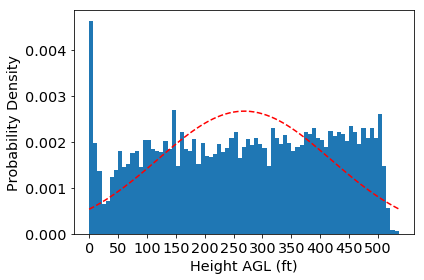

In [125]:
make_histogram(agls, 50.0, 'agl_hist.png', 'Height AGL (ft)')

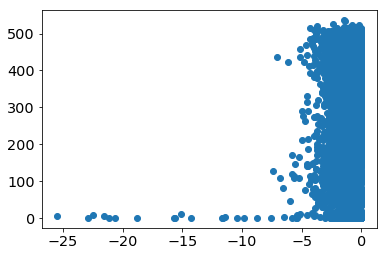

In [128]:
fig, ax = plt.subplots()
ax.scatter(speed_diffs, agls)

-8.269435389434785 317.6867618569788
76
-1000.0 4000.0


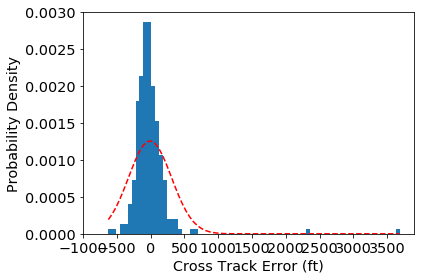

In [133]:
make_histogram(turn_ctrs, 500.0, 'turn_ctrs_hist.png', 'Cross Track Error (ft)')

In [135]:
for x in sorted(turn_ctrs):
    print(x)

-624.1147150035875
-521.8378295357429
-428.6262132621177
-397.59214684189635
-380.7283447869736
-350.58309058142447
-333.52670923905146
-328.8776208240307
-322.38734834844075
-301.0152491929263
-291.3096859845865
-281.32341206208446
-279.6161154842158
-270.6803585877937
-251.58806202698614
-251.30648963094248
-233.22464790311858
-231.0907515033378
-229.6625097149896
-227.51658029096512
-225.69508021641482
-225.57458673622133
-224.21072255920382
-221.4627520875645
-218.30428288414083
-212.34786620292212
-205.2724522913607
-205.0130236921799
-203.05346677114144
-197.53103572537344
-195.05164720998724
-191.75105477413635
-189.66428223512466
-187.56081356201548
-187.53012078456254
-186.74448967779256
-184.4592039883297
-183.3426500431834
-181.21391326055834
-180.70772724281258
-177.2899835728481
-176.64763442437615
-176.18751686743207
-171.72224616732734
-169.63146257846785
-169.56442039326447
-169.19147593326133
-168.7278192378905
-167.6539968350266
-167.05217256065552
-164.787468537253
-

87.16842105263157 7.260189101208563
11
64.0 100.0


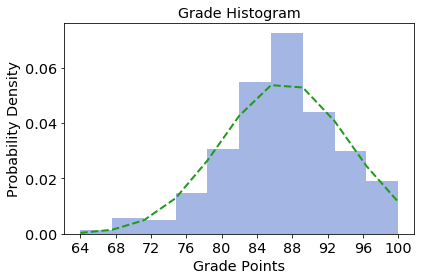

In [30]:
import MySQLdb as mysql
from config import db_credentials
import json

ENV = 'dev'
db_creds = db_credentials[ENV]

db = mysql.connect(**db_creds)
cursor = db.cursor(mysql.cursors.DictCursor)

sql = """\
    SELECT flight_id, approach_id, score
    FROM approaches
    WHERE flight_id IN (381046, 381218, 381233, 381349, 381812, 382172, 382178, 382486, 382496, 382538, 382741, 382928, 383219, 383403, 383544, 383556, 383749, 383781, 383790, 384269, 384270, 384307, 384326, 384412, 384420, 384441, 384445, 384460, 384476, 384647, 384674, 384965, 385012, 385331, 385645, 385690, 385836, 386486, 386666, 386765, 386800, 387160, 387181, 387201, 387607, 387627, 387765, 387949, 388186, 388192, 388354, 388498, 388638, 388639, 389027, 389165, 389178, 389421, 389521, 389844, 389850, 390048, 390052, 390082, 390131, 390247, 392334, 392504, 392538, 392706, 392824, 392836, 392886, 392898, 392955, 393046, 393230, 393246, 393289, 393554, 393655, 393769, 393837, 394127, 394355, 394362, 394365, 394475, 394645, 394766, 394927, 394933, 394998, 395219, 395220, 395316, 395374, 395599, 397800, 397803);
"""

cursor.execute(sql)
results = cursor.fetchall()
scores = [f['score'] for f in results]

with open('scores.txt', 'w') as handle:
    json.dump(scores, handle)

make_histogram(scores, 4.0, 'orig_scores_hist.png', 'Grade Points', title='Grade Histogram', num_bins=10)